In [17]:
%matplotlib widget

import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from PIL import Image

# Developing code to coregister the stiched image with digitalized electrode position for further anatomical labelling
import numpy as np
import matplotlib.pyplot as plt


In [18]:
t_path = '/Users/ovinogradov/Documents/Projects/SCN1A/MEA-analysis/data/templates/MEA256.tif'
template = plt.imread(t_path)

image_path = '/Users/ovinogradov/Documents/Projects/SCN1A/MEA-analysis/data/slice_images/28-11-24/slice1/28-11-24-slice1-fused.tif'
I = plt.imread(image_path)


In [19]:
I.shape

(3315, 3590)

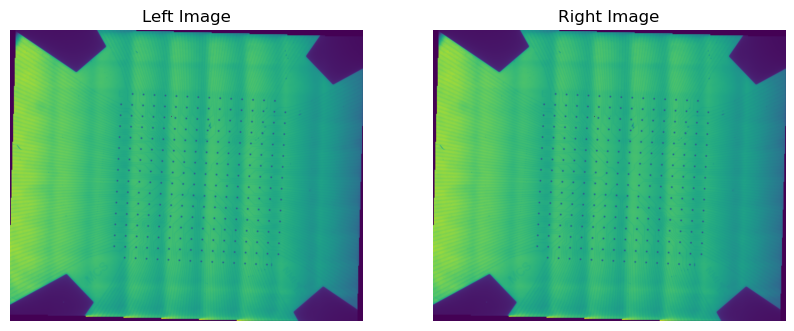

In [4]:


#%%



# Sample image paths (replace these with your actual image paths)
image_paths = [t_path,image_path]

# Global variables
current_index = 0
selected_points = []

def load_image(path):
    """Load an image using PIL and return it."""
    return Image.open(path)

def update_display():
    """Update the display with the current images."""
    global current_index, selected_points
    selected_points = []  # Reset selected points for new image

    # Load images
    left_image = load_image(image_paths[current_index])
    right_image = load_image(image_paths[current_index])
    
    # Display the images
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(left_image)
    axes[0].set_title("Left Image")
    axes[0].axis("off")

    axes[1].imshow(right_image)
    axes[1].set_title("Right Image")
    axes[1].axis("off")

    # Connect the click event
    def on_click(event):
        if event.inaxes == axes[1]:  # Ensure click is on the right image
            if len(selected_points) < 3:
                # Add a cross to the clicked position
                selected_points.append((event.xdata, event.ydata))
                axes[1].plot(event.xdata, event.ydata,'xr')
                plt.draw()
    
    fig.canvas.mpl_connect("button_press_event", on_click)
    plt.show()

def detect_action(_):
    """Function to handle 'Detect' button press."""
    clear_output(wait=True)
    print(f"Selected points: {selected_points}")
    update_display()

def next_image(_):
    """Function to load the next image."""
    global current_index
    if current_index < len(image_paths) - 1:
        current_index += 1
    clear_output(wait=True)
    update_display()

def previous_image(_):
    """Function to load the previous image."""
    global current_index
    if current_index > 0:
        current_index -= 1
    clear_output(wait=True)
    update_display()

# Buttons
detect_button = widgets.Button(description="Detect")
detect_button.on_click(detect_action)

next_button = widgets.Button(description="Next")
next_button.on_click(next_image)

prev_button = widgets.Button(description="Previous")
prev_button.on_click(previous_image)

# Layout
button_box = widgets.HBox([prev_button, detect_button, next_button])
display(button_box)

# Initial display
update_display()

In [5]:
selected_points

[]

In [12]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from PIL import Image

# Ensure interactive plotting backend is set up
%matplotlib notebook

# Sample image paths (replace these with your actual image paths)
# image_paths = ["image1.jpg", "image2.jpg", "image3.jpg"]
image_paths = [t_path,image_path]

# Global variables
current_index = 0
selected_points = []

# Create separate output areas
plot_output = widgets.Output()
button_output = widgets.Output()

def load_image(path):
    """Load an image using PIL and return it."""
    return Image.open(path)

def update_display():
    """Update the display with the current images."""
    global current_index, selected_points
    selected_points = []  # Reset selected points for new image

    with plot_output:
        clear_output(wait=True)  # Clear the plot area

        # Load images
        left_image = load_image(image_paths[current_index])
        right_image = load_image(image_paths[current_index])
        
        # Create interactive figure
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        axes[0].imshow(left_image)
        axes[0].set_title("Left Image")
        axes[0].axis("off")

        axes[1].imshow(right_image)
        axes[1].set_title("Right Image")
        axes[1].axis("off")

        # Click event function
        def on_click(event):
            if event.inaxes == axes[1]:  # Ensure click is on the right image
                if len(selected_points) < 3:
                    x, y = event.xdata, event.ydata
                    selected_points.append((x, y))
                    axes[1].add_patch(Circle((x, y), radius=5, color='red'))
                    fig.canvas.draw()

        # Connect the click event to the figure
        fig.canvas.mpl_connect("button_press_event", on_click)
        plt.show()

def detect_action(_):
    """Function to handle 'Detect' button press."""
    print(f"Selected points: {selected_points}")

def next_image(_):
    """Function to load the next image."""
    global current_index
    if current_index < len(image_paths) - 1:
        current_index += 1
    update_display()

def previous_image(_):
    """Function to load the previous image."""
    global current_index
    if current_index > 0:
        current_index -= 1
    update_display()

# Buttons
detect_button = widgets.Button(description="Detect")
detect_button.on_click(detect_action)

next_button = widgets.Button(description="Next")
next_button.on_click(next_image)

prev_button = widgets.Button(description="Previous")
prev_button.on_click(previous_image)

# Layout
with button_output:
    display(widgets.HBox([prev_button, detect_button, next_button]))

# Display everything
display(button_output, plot_output)
update_display()

Output()

Output()

In [23]:
plot = figure(title="Select Points", tools="pan,box_zoom,reset,tap", width=500, height=500)


In [24]:
I.shape

(3315, 3590)

In [26]:
from bokeh.plotting import figure, curdoc
from bokeh.models import ColumnDataSource, Button, TextInput, Div
from bokeh.layouts import column, row
from bokeh.events import Tap
from bokeh.models.tools import LassoSelectTool
import pandas as pd
from PIL import Image
import numpy as np

# Initialize variables
# image_paths
current_index = 0
selected_points = []
selected_area = []
dataframe = pd.DataFrame(columns=["x", "y", "area_name"])

# Create data source for the selected points
points_source = ColumnDataSource(data={"x": [], "y": []})

# Create a figure to display the image
plot = figure(title="Select Points", tools="pan,box_zoom,reset,tap", width=500, height=500)
plot.xgrid.visible = False
plot.ygrid.visible = False

# Lasso select tool
lasso_select_tool = LassoSelectTool()
plot.add_tools(lasso_select_tool)

# Load the first image
def load_image(index):
    img = Image.open(image_paths[index]).convert("RGBA")
    img_array = np.array(img)
    # img_rgba = (img_array[:, :, 0:3].astype(np.uint32) << 8) | img_array[:, :, 3]
    plot.image(img_array)#, x=0, y=0, dw=img.width, dh=img.height)

load_image(current_index)

# Update image display
def update_image():
    global current_index
    plot.renderers = []  # Clear previous image
    load_image(current_index)

# Navigation buttons
def next_image():
    global current_index
    if current_index < len(image_paths) - 1:
        current_index += 1
        update_image()

def previous_image():
    global current_index
    if current_index > 0:
        current_index -= 1
        update_image()

# Callback for selecting points
def select_points():
    global selected_points
    selected_points.clear()
    plot.on_event(Tap, lambda event: add_point(event))

def add_point(event):
    global selected_points
    if len(selected_points) < 3:
        selected_points.append((event.x, event.y))
        points_source.data = {"x": [p[0] for p in selected_points], "y": [p[1] for p in selected_points]}

# Coregister button callback
def coregister():
    print(f"Coregistration logic triggered with points: {selected_points}")

# Callback for lasso selection
def lasso_select_callback(attr, old, new):
    global selected_area
    selected_area = [[points_source.data['x'][i], points_source.data['y'][i]] for i in points_source.selected.indices]

points_source.selected.on_change("indices", lasso_select_callback)

# Input field and save button callback
area_name_input = TextInput(title="Area Name:")
def save_area():
    global dataframe
    if area_name_input.value and selected_area:
        for x, y in selected_area:
            dataframe = dataframe.append({"x": x, "y": y, "area_name": area_name_input.value}, ignore_index=True)
        print(f"Saved area to dataframe:\n{dataframe}")

# Create buttons and layout
prev_button = Button(label="Previous", button_type="primary")
prev_button.on_click(previous_image)

next_button = Button(label="Next", button_type="primary")
next_button.on_click(next_image)

select_points_button = Button(label="Select Points", button_type="success")
select_points_button.on_click(select_points)

coregister_button = Button(label="Coregister", button_type="warning")
coregister_button.on_click(coregister)

save_button = Button(label="Save", button_type="success")
save_button.on_click(save_area)

# Layout
controls = column(
    prev_button,
    next_button,
    select_points_button,
    coregister_button,
    Div(text="<b>Select Area:</b>"),
    area_name_input,
    save_button
)

layout = row(controls, plot)
curdoc().add_root(layout)

RuntimeError: Columns need to be 1D (image is not)

In [28]:
I

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(3315, 3590), dtype=uint16)

In [15]:
from bokeh.layouts import layout
from bokeh.models import Div, RangeSlider, Spinner
from bokeh.plotting import figure, show

# prepare some data
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [4, 5, 5, 7, 2, 6, 4, 9, 1, 3]

# create plot with circle glyphs
p = figure(x_range=(1, 9), width=500, height=250)
points = p.scatter(x=x, y=y, size=30, fill_color="#21a7df")

# set up textarea (div)
div = Div(
    text="""
          <p>Select the circle's size using this control element:</p>
          """,
    width=200,
    height=30,
)

# set up spinner
spinner = Spinner(
    title="Circle size",
    low=0,
    high=60,
    step=5,
    value=points.glyph.size,
    width=200,
)
spinner.js_link("value", points.glyph, "size")

# set up RangeSlider
range_slider = RangeSlider(
    title="Adjust x-axis range",
    start=0,
    end=10,
    step=1,
    value=(p.x_range.start, p.x_range.end),
)
range_slider.js_link("value", p.x_range, "start", attr_selector=0)
range_slider.js_link("value", p.x_range, "end", attr_selector=1)

# create layout
layout = layout(
    [
        [div, spinner],
        [range_slider],
        [p],
    ],
)

# show result
show(layout)